## Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la siguiente url https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular.

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

        "coche": Nombres de los coches.

        "precio_rebajado": Precios rebajados.

        "precio_original": Precios originales.

        "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este:

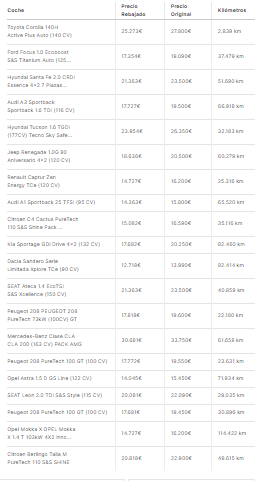

In [61]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [24]:
res_coches=requests.get(f"https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")

if res_coches.status_code != 200:
    
    print ("Ha habido un error para acceder a la pagina y resolver la petición")
    
    


<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="image" href="/hera/icons/home.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/filter.svg" rel="preload"/>
  <link as="image" href="/hera/icons/ribbon.svg" rel="preload"/>
  <link as="image" href="/hera/icons/favourite.svg" rel="preload"/>
  <link as="image" href="/hera/icons/C.svg" rel="preload"/>
  <link as="image" href="/hera/icons/0_EMISIONES.svg" rel="preload"/>
  <link as="image" fetchpriority="high" href="/hera/icons/adSell
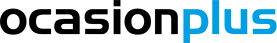

In [25]:
soup_coches = BeautifulSoup(res_coches.content,"html.parser")

print(soup_coches.prettify())

In [35]:
lista_nombres_coche = soup_coches.find_all("span", {"class": "cardVehicle_finance__SG6JV","data-test":"span-version"})

lista_nombres_coche


[<span class="cardVehicle_finance__SG6JV" data-test="span-version">5 Puertas Cooper SD 125 kW (170 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">1.5 TSI DSG 110 kW (150 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">1.0 Ecoboost S&amp;S ST-Line 92 kW (125 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">Intens TCe (140 CV) GPF</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">E-Hybrid 340 kW (462 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">3 Puertas John Cooper Works (231 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">Mercedes-Benz Clase GLC 43 AMG 4Matic PACK AMG (367 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">Combi Combi 2.0 TDI Ambition DSG (150 CV)</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-version">Furgon BlueHDi 130 33 L2H2 (130 CV)</span

In [39]:
listado_coches= []

for coche in lista_nombres_coche:
    listado_coches.append(coche.getText())
    
listado_coches

['5 Puertas Cooper SD 125 kW (170 CV)',
 '1.5 TSI DSG 110 kW (150 CV)',
 '1.0 Ecoboost S&S ST-Line 92 kW (125 CV)',
 'Intens TCe (140 CV) GPF',
 'E-Hybrid 340 kW (462 CV)',
 '3 Puertas John Cooper Works (231 CV)',
 'Mercedes-Benz Clase GLC 43 AMG 4Matic PACK AMG (367 CV)',
 'Combi Combi 2.0 TDI Ambition DSG (150 CV)',
 'Furgon BlueHDi 130 33 L2H2 (130 CV)',
 '2.0 Ecoblue ST-Line (150 CV)',
 'sDrive18d Business (150 CV)',
 '1.6GT-S CVT Executive Plus 4WD Auto (170CV)',
 '118i (140 CV) Pack M',
 '2.0 TDI S tronic (190 CV) Pack S line',
 '2.5 CRDi 6.2m Klass  (150 CV)',
 '1.0 DIG-T Acenta 4x2 DCT 84 kW (114 CV)',
 'BlueHDi 120 S&S Pro Standard 88 kW (120 CV)',
 '1.8 16v Essentia 140 CV',
 'Pro S Automático (204 CV)',
 '1.2 8v Lounge (69 CV)']

In [40]:
lista_precios_rebajados_coches = soup_coches.find_all("span", {"class": "cardVehicle_finance__SG6JV","data-test":"span-finance"})

lista_precios_rebajados_coches

[<span class="cardVehicle_finance__SG6JV" data-test="span-finance">23.363€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">27.627€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">14.454€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">14.818€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">72.718€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">27.181€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">53.627€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">29.272€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">19.081€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">19.818€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">22.000€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">23.182€</span>,
 <sp

In [53]:
listado_precios_rebajados= []

for precio in lista_precios_rebajados_coches:
    listado_precios_rebajados.append(precio.getText())
    
listado_precios_rebajados

['23.363€',
 '27.627€',
 '14.454€',
 '14.818€',
 '72.718€',
 '27.181€',
 '53.627€',
 '29.272€',
 '19.081€',
 '19.818€',
 '22.000€',
 '23.182€',
 '24.445€',
 '19.772€',
 '14.272€',
 '17.454€',
 '20.409€',
 '8.900€',
 '25.909€',
 '6.900€']

In [54]:
#Pasamos los precios a Número por si tenemos que operar con ellos.

listado_precios_rebajados = [float(precio.split("€")[0].replace(".", "").replace(",", ".")) for precio in listado_precios_rebajados]
print("Los resultados después de limpiar la información contenida en la lista 'precios_rebajados' es:\n", listado_precios_rebajados)


Los resultados después de limpiar la información contenida en la lista 'precios_productos' es:
 [23363.0, 27627.0, 14454.0, 14818.0, 72718.0, 27181.0, 53627.0, 29272.0, 19081.0, 19818.0, 22000.0, 23182.0, 24445.0, 19772.0, 14272.0, 17454.0, 20409.0, 8900.0, 25909.0, 6900.0]


In [55]:
lista_precios_originales_coches = soup_coches.find_all("span", {"class": "cardVehicle_spot__e6YZx","data-test":"span-price"})

lista_precios_originales_coches

[<span class="cardVehicle_spot__e6YZx" data-test="span-price">25.700€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">30.390€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">15.900€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">79.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">32.200€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">20.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">21.800€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">24.200€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">25.500€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">26.890€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">21.750€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">15.700€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">19

In [56]:
listado_precios_originales= []

for precio in lista_precios_originales_coches:
    listado_precios_originales.append(precio.getText())
    
listado_precios_originales

['25.700€',
 '30.390€',
 '15.900€',
 '79.990€',
 '32.200€',
 '20.990€',
 '21.800€',
 '24.200€',
 '25.500€',
 '26.890€',
 '21.750€',
 '15.700€',
 '19.200€',
 '22.450€',
 '28.500€']

In [57]:
#Pasamos los precios a Número por si tenemos que operar con ellos.

listado_precios_originales = [float(precio.split("€")[0].replace(".", "").replace(",", ".")) for precio in listado_precios_originales]
print("Los resultados después de limpiar la información contenida en la lista 'precios_rebajados' es:\n", listado_precios_originales)


Los resultados después de limpiar la información contenida en la lista 'precios_rebajados' es:
 [25700.0, 30390.0, 15900.0, 79990.0, 32200.0, 20990.0, 21800.0, 24200.0, 25500.0, 26890.0, 21750.0, 15700.0, 19200.0, 22450.0, 28500.0]


In [58]:
lista_kilometros_coches = soup_coches.find_all("span", {"class": "characteristics_elements__Mb1S_","data-test":"span-km"})

lista_kilometros_coches

[<span class="characteristics_elements__Mb1S_" data-test="span-km">54.941 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">2.989 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">83.575 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">76.883 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">127.946 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">38.549 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">30.523 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">19.247 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">118.852 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">66.244 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">72.536 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-k

In [59]:
listado_kilometros_originales= []

for kms in lista_kilometros_coches:
    listado_kilometros_originales.append(kms.getText())
    
listado_kilometros_originales

['54.941 Km',
 '2.989 Km',
 '83.575 Km',
 '76.883 Km',
 '127.946 Km',
 '38.549 Km',
 '30.523 Km',
 '19.247 Km',
 '118.852 Km',
 '66.244 Km',
 '72.536 Km',
 '84.630 Km',
 '41.980 Km',
 '150.167 Km',
 '191.018 Km',
 '31.076 Km',
 '49.701 Km',
 '106.116 Km',
 '55.489 Km',
 '92.659 Km']

In [ ]:
#Vamos a construir el DataFrame

df = pd.DataFrame()
